In [1]:
#import
import pandas as pd
import matplotlib.pyplot as pp
import numpy as np
from datetime import datetime

In [2]:
#custom settings to make pandas output larger
pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 150) #default is 80


In [3]:
#load the data
Q12016 = pd.read_csv('2016Q1-capitalbikeshare-tripdata.csv', sep=',')
Q22016 = pd.read_csv('2016Q2-capitalbikeshare-tripdata.csv', sep=',')
Q32016 = pd.read_csv('2016Q3-capitalbikeshare-tripdata.csv', sep=',')
Q42016 = pd.read_csv('2016Q4-capitalbikeshare-tripdata.csv', sep=',')
H116 = Q12016.append(Q22016)
H216 = Q32016.append(Q42016)
df = H116.append(H216)


In [4]:
#create a count column for recording the number of trips when grouping another variable
df['Trip count'] = 1


In [5]:
#convert to datetime from object
df['Start date'] = pd.to_datetime(df['Start date'], format="%Y/%m/%d %H:%M:%S")

In [6]:
#extract year
df['Start Year'] = df['Start date'].dt.year

In [7]:
#extract month
df['Start Month'] = df['Start date'].dt.month

In [8]:
#find day of the week
#0-6, Sunday-Saturday
df['StartDayofweek']=df['Start date'].dt.weekday

In [9]:
#extract hour of the day, goes from 0-23
df['Start hour'] = df['Start date'].dt.hour

In [10]:
#extract day
df['Start day'] = df['Start date'].dt.day

In [11]:
#extract different datemetrics for end time
df['End date'] = pd.to_datetime(df['End date'], format="%Y/%m/%d %H:%M:%S")
#extract year
df['End Year'] = df['End date'].dt.year
#extract month
df['End Month'] = df['End date'].dt.month
#find day of the week
#0-6, Sunday-Saturday
df['ENDDayofweek']=df['End date'].dt.weekday
#extract hour of the day, goes from 0-23
df['End hour'] = df['End date'].dt.hour
#extract day
df['End day'] = df['End date'].dt.day


In [12]:
df.head(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Trip count,Start Year,Start Month,StartDayofweek,Start hour,Start day,End Year,End Month,ENDDayofweek,End hour,End day
0,166,2016-01-01 00:06:58,2016-01-01 00:09:44,31102,11th & Kenyon St NW,31105,14th & Harvard St NW,W01346,Member,1,2016,1,4,0,1,2016,1,4,0,1
1,448,2016-01-01 00:10:20,2016-01-01 00:17:48,32039,Old Georgetown Rd & Southwick St,32002,Bethesda Ave & Arlington Rd,W22202,Member,1,2016,1,4,0,1,2016,1,4,0,1
2,715,2016-01-01 00:13:52,2016-01-01 00:25:48,31222,New York Ave & 15th St NW,31214,17th & Corcoran St NW,W21427,Member,1,2016,1,4,0,1,2016,1,4,0,1
3,213,2016-01-01 00:15:29,2016-01-01 00:19:03,31506,1st & Rhode Island Ave NW,31509,New Jersey Ave & R St NW,W01294,Member,1,2016,1,4,0,1,2016,1,4,0,1
4,872,2016-01-01 00:16:16,2016-01-01 00:30:49,31041,Prince St & Union St,31048,King St Metro South,W22058,Member,1,2016,1,4,0,1,2016,1,4,0,1


In [13]:
#show data types
df.dtypes

Duration                         int64
Start date              datetime64[ns]
End date                datetime64[ns]
Start station number             int64
Start station                   object
End station number               int64
End station                     object
Bike number                     object
Member type                     object
Trip count                       int64
Start Year                       int64
Start Month                      int64
StartDayofweek                   int64
Start hour                       int64
Start day                        int64
End Year                         int64
End Month                        int64
ENDDayofweek                     int64
End hour                         int64
End day                          int64
dtype: object

In [14]:
#number of observations
len(df.index)

3333994

In [15]:
#identify shape of dataframe
df.shape

(3333994, 20)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


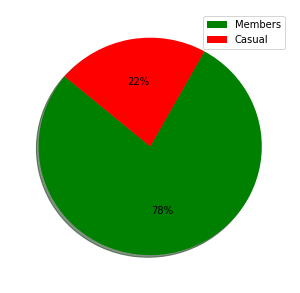

In [16]:
#grouping the original data frame by member type and then summing other columns for each member type
membertype = df.groupby(['Member type']).sum()
#calculate the number of trips from members and pass to variable data
data = pd.Series(membertype.ix[['Member'],['Trip count']])

#calculate the percentage of trips from members commpared to casual
#chart it using a pie chart

pp.figure(figsize=(5,5))
sizes = [data, (df['Trip count']).sum()-data]
labels = ['Members', 'Casual']
colors = ['Green', 'Red']
pp.pie(sizes, colors=colors, autopct='%.0f%%', shadow=True, startangle = 140)
pp.legend(labels)
pp.show()



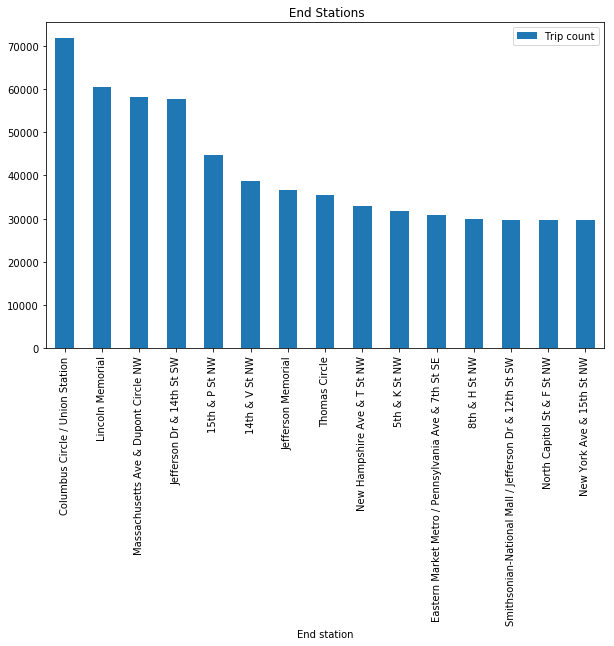

In [17]:
#see which stations are popular
endstations = df.groupby(['End station']).sum()
endstation = endstations.drop(['Duration', 'Start station number', 'Start Year', 'End station number', 'End hour', 'Start day', 'Start hour', 'End day', 'ENDDayofweek', 'Start Month', 'StartDayofweek','End Year', 'End Month', 'StartDayofweek'], axis=1)
#subset down to top stations
subset = endstation.sort_values(by='Trip count',ascending=False).head(15)
#get bar graph of all Start Stations
subset.plot(kind='bar', figsize=(10,6), stacked=False, title=' End Stations')
pp.show()


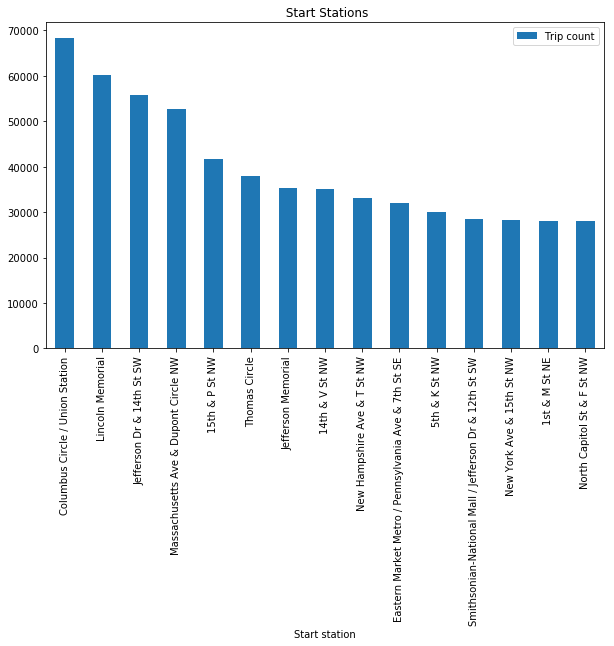

In [18]:
#see which stations are popular
startstations = df.groupby(['Start station']).sum()
startstation = startstations.drop(['Duration', 'Start station number', 'Start Year', 'End station number', 'End hour', 'Start day', 'Start hour', 'End day', 'ENDDayofweek', 'Start Month', 'StartDayofweek','End Year', 'End Month', 'StartDayofweek'], axis=1)
#subset down to top stations
subset = startstation.sort_values(by='Trip count',ascending=False).head(15)
#get bar graph of all Start Stations
subset.plot(kind='bar', figsize=(10,6), stacked=False, title=' Start Stations')
pp.show()


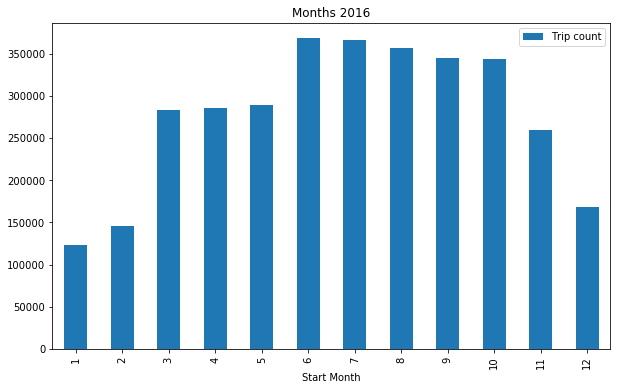

In [19]:
#see which months have most trips
startmonthss = df.groupby('Start Month').sum()
startmonthss = startmonthss.drop(['Duration', 'Start station number', 'End station number', 'Start day', 'End day', 'Start Year', 'StartDayofweek', 'Start hour', 'End Year', 'End Month', 'ENDDayofweek', 'End hour'], axis=1)
#get bar graph of all Start Stations
startmonthss.plot(kind='bar', figsize=(10,6), stacked=False, title='Months 2016')
pp.show()


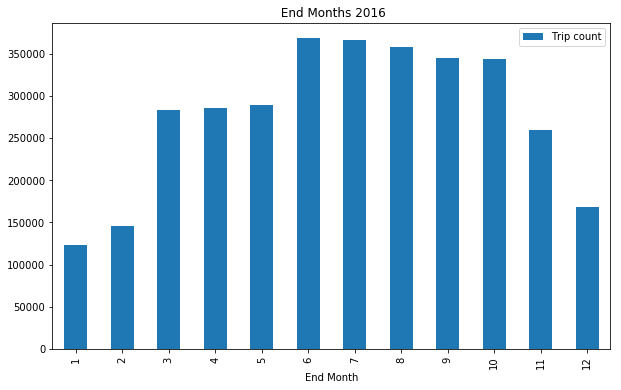

In [20]:
#see which months have most trips
endmonthss = df.groupby('End Month').sum()
endmonthss = endmonthss.drop(['Duration', 'Start station number', 'End station number', 'Start day', 'End day', 'Start Year', 'StartDayofweek', 'Start hour', 'End Year', 'Start Month', 'ENDDayofweek', 'End hour'], axis=1)
#get bar graph of all Start Stations
endmonthss.plot(kind='bar', figsize=(10,6), stacked=False, title=' End Months 2016')
pp.show()


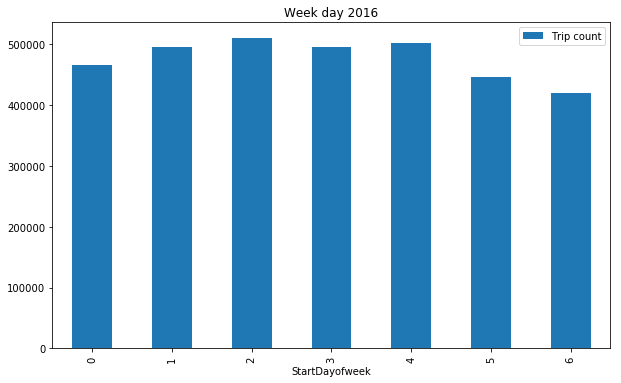

In [21]:
#see which day of the week have most trips
startdayss = df.groupby('StartDayofweek').sum()
startdayss = startdayss.drop(['Duration', 'Start station number', 'End station number', 'Start day', 'End day', 'Start Year', 'Start Month', 'Start hour', 'End Year', 'End Month', 'ENDDayofweek', 'End hour'], axis=1)
#get bar graph of all Start Stations
startdayss.plot(kind='bar', figsize=(10,6), stacked=False, title='Week day 2016')
pp.show()


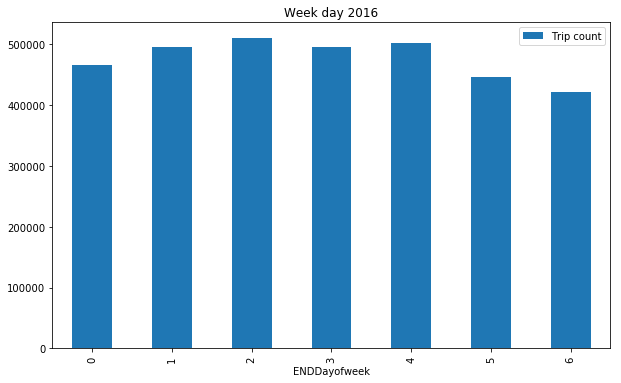

In [22]:
#see which day of the week have most trips
enddayss = df.groupby('ENDDayofweek').sum()
enddayss = enddayss.drop(['Duration', 'Start station number', 'End station number', 'Start day', 'End day', 'Start Year', 'Start Month', 'Start hour', 'End Year', 'End Month', 'StartDayofweek', 'End hour'], axis=1)
#get bar graph of all Start Stations
enddayss.plot(kind='bar', figsize=(10,6), stacked=False, title='Week day 2016')
pp.show()


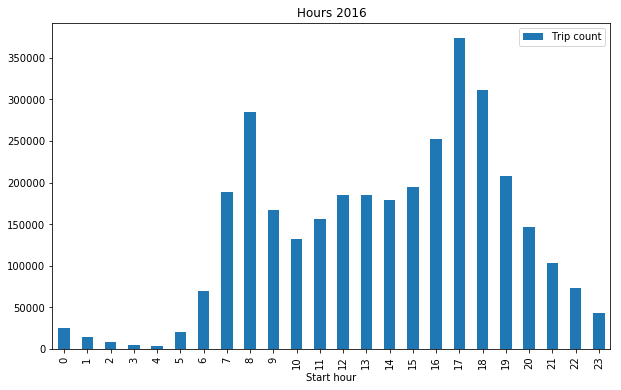

In [23]:
#see which hour of the week have most trips
starthourss = df.groupby('Start hour').sum()
starthourss = starthourss.drop(['Duration', 'Start station number', 'Start day', 'End day', 'End station number', 'Start Year', 'Start Month', 'ENDDayofweek','End Year', 'End Month', 'StartDayofweek', 'End hour'], axis=1)
#get bar graph of all Start Stations
starthourss.plot(kind='bar', figsize=(10,6), stacked=False, title='Hours 2016')
pp.show()


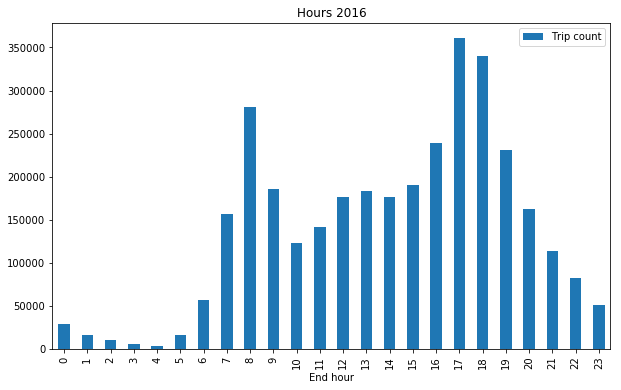

In [24]:
#see which hour of the week have most trips
endhourss = df.groupby('End hour').sum()
endhourss = endhourss.drop(['Duration', 'Start station number', 'End station number', 'Start day', 'End day', 'Start Year', 'Start hour', 'ENDDayofweek', 'Start Month', 'StartDayofweek','End Year', 'End Month', 'StartDayofweek'], axis=1)
#get bar graph of all End hour
endhourss.plot(kind='bar', figsize=(10,6), stacked=False, title='Hours 2016')
pp.show()


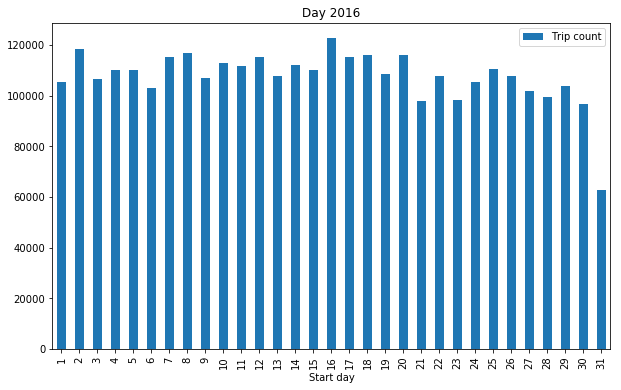

In [25]:
#see which day of the month have most trips
startdayss = df.groupby('Start day').sum()
startdayss = startdayss.drop(['Duration', 'Start station number', 'End station number', 'End hour', 'End day', 'Start Year', 'Start hour', 'ENDDayofweek', 'Start Month', 'StartDayofweek','End Year', 'End Month', 'StartDayofweek'], axis=1)
#get bar graph of all End hour
startdayss.plot(kind='bar', figsize=(10,6), stacked=False, title='Day 2016')
pp.show()


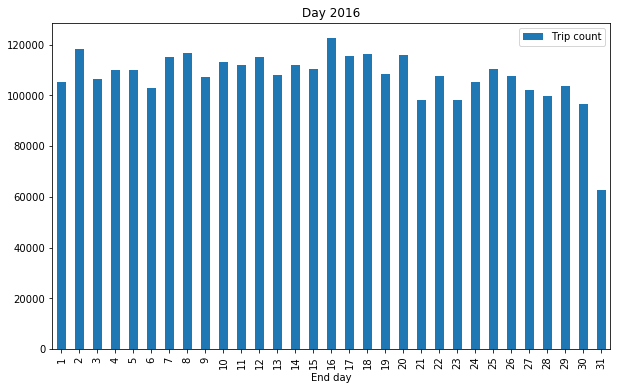

In [26]:
#see which day of the month have most trips
enddayss = df.groupby('End day').sum()
enddayss = enddayss.drop(['Duration', 'Start station number', 'End station number', 'End hour', 'Start day', 'Start Year', 'Start hour', 'ENDDayofweek', 'Start Month', 'StartDayofweek','End Year', 'End Month', 'StartDayofweek'], axis=1)
#get bar graph of all End hour
enddayss.plot(kind='bar', figsize=(10,6), stacked=False, title='Day 2016')
pp.show()


In [27]:
#seeing the longest trip
df.sort_values(by='Duration',ascending=False, na_position='last').head(1)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Trip count,Start Year,Start Month,StartDayofweek,Start hour,Start day,End Year,End Month,ENDDayofweek,End hour,End day
490282,86357,2016-05-24 17:42:33,2016-05-25 17:41:50,31240,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,31247,Jefferson Dr & 14th St SW,W22444,Casual,1,2016,5,1,17,24,2016,5,2,17,25


In [28]:
#seeing the longest trip
df.sort_values(by='Duration',ascending=True, na_position='last').head(1)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Trip count,Start Year,Start Month,StartDayofweek,Start hour,Start day,End Year,End Month,ENDDayofweek,End hour,End day
645380,60,2016-12-07 08:42:16,2016-12-07 08:43:17,31111,10th & U St NW,31268,12th & U St NW,W21964,Member,1,2016,12,2,8,7,2016,12,2,8,7


In [29]:
#find average duration
duration = df.groupby('Start Year').mean()
duration

,Duration,Start station number,End station number,Trip count,Start Month,StartDayofweek,Start hour,Start day,End Year,End Month,ENDDayofweek,End hour,End day
Start Year,,,,,,,,,,,,,
2016,1149.812143,31309.198912,31310.118306,1.0,6.865643,2.926846,13.944934,15.570014,2016.000005,6.865682,2.927354,14.163308,15.57087


In [30]:
#subset to weekday only information
#o=monday and 6=sunday
#this is 0-4
weekdaysonly = df.ix[df['StartDayofweek']<5]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


In [31]:
weekdaysonly.head(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Trip count,Start Year,Start Month,StartDayofweek,Start hour,Start day,End Year,End Month,ENDDayofweek,End hour,End day
0,166,2016-01-01 00:06:58,2016-01-01 00:09:44,31102,11th & Kenyon St NW,31105,14th & Harvard St NW,W01346,Member,1,2016,1,4,0,1,2016,1,4,0,1
1,448,2016-01-01 00:10:20,2016-01-01 00:17:48,32039,Old Georgetown Rd & Southwick St,32002,Bethesda Ave & Arlington Rd,W22202,Member,1,2016,1,4,0,1,2016,1,4,0,1
2,715,2016-01-01 00:13:52,2016-01-01 00:25:48,31222,New York Ave & 15th St NW,31214,17th & Corcoran St NW,W21427,Member,1,2016,1,4,0,1,2016,1,4,0,1
3,213,2016-01-01 00:15:29,2016-01-01 00:19:03,31506,1st & Rhode Island Ave NW,31509,New Jersey Ave & R St NW,W01294,Member,1,2016,1,4,0,1,2016,1,4,0,1
4,872,2016-01-01 00:16:16,2016-01-01 00:30:49,31041,Prince St & Union St,31048,King St Metro South,W22058,Member,1,2016,1,4,0,1,2016,1,4,0,1


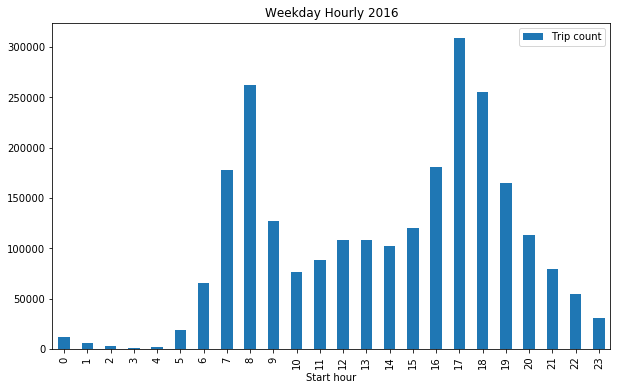

In [32]:
#see which hour of the weekdays have most trips
hourly = weekdaysonly.groupby('Start hour').sum()
hourly = hourly.drop(['Duration', 'Start station number', 'Start day', 'End day', 'End station number', 'Start Year', 'Start Month', 'ENDDayofweek','End Year', 'End Month', 'StartDayofweek', 'End hour'], axis=1)
#get bar graph of all Start Stations
hourly.plot(kind='bar', figsize=(10,6), stacked=False, title='Weekday Hourly 2016')
pp.show()


In [33]:
#subset to weekends only information
#o=monday and 6=sunday
#this is  5 and 6
weekendonly = df.ix[df['StartDayofweek'] > 4]
weekendonly.head(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Trip count,Start Year,Start Month,StartDayofweek,Start hour,Start day,End Year,End Month,ENDDayofweek,End hour,End day
3220,375,2016-01-02 00:03:01,2016-01-02 00:09:16,31602,Park Rd & Holmead Pl NW,31105,14th & Harvard St NW,W01357,Member,1,2016,1,5,0,2,2016,1,5,0,2
3221,571,2016-01-02 00:03:48,2016-01-02 00:13:19,31228,8th & H St NW,31509,New Jersey Ave & R St NW,W20000,Member,1,2016,1,5,0,2,2016,1,5,0,2
3222,400,2016-01-02 00:04:21,2016-01-02 00:11:02,31102,11th & Kenyon St NW,31107,Lamont & Mt Pleasant NW,W00539,Member,1,2016,1,5,0,2,2016,1,5,0,2
3223,391,2016-01-02 00:04:31,2016-01-02 00:11:03,31102,11th & Kenyon St NW,31107,Lamont & Mt Pleasant NW,W01125,Member,1,2016,1,5,0,2,2016,1,5,0,2
3224,574,2016-01-02 00:05:19,2016-01-02 00:14:53,31200,Massachusetts Ave & Dupont Circle NW,31102,11th & Kenyon St NW,W21125,Member,1,2016,1,5,0,2,2016,1,5,0,2


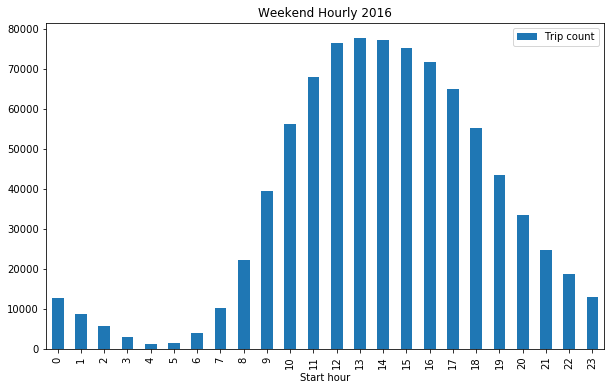

In [34]:
#see which hour of the weekdays have most trips
weekend = weekendonly.groupby('Start hour').sum()
weekend = weekend.drop(['Duration', 'Start station number', 'Start day', 'End day', 'End station number', 'Start Year', 'Start Month', 'ENDDayofweek','End Year', 'End Month', 'StartDayofweek', 'End hour'], axis=1)
#get bar graph of all Start Stations
weekend.plot(kind='bar', figsize=(10,6), stacked=False, title='Weekend Hourly 2016')
pp.show()
